# Count the Number of Reads Per Chromosome by Cluster

In [71]:
# Imports
import os
import sys

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
sys.path.insert(0, '../lib')
from larval_gonad.notebook import Nb
from larval_gonad.x_to_a import idx_stats_by_cluster

# Setup notebook
nbconfig = Nb.setup_notebook()

# Turn on cache
from joblib import Memory
memory = Memory(cachedir=nbconfig.cache, verbose=0)


last updated: 2018-01-24 
Git hash: 030fdcfce56c014f54c3c8e623519aea867f128a


In [72]:
mem_idx_stats_by_cluster = memory.cache(idx_stats_by_cluster)

results = mem_idx_stats_by_cluster('../output/testis1/outs/possorted_genome_bam.bam', 
                                   '../output/testes_scRNAseq_pilot/clusters.tsv')

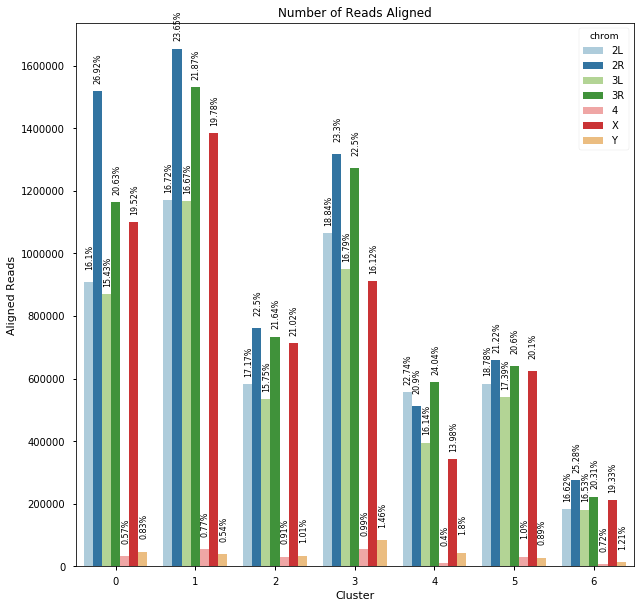

In [164]:
melted = results.reset_index().melt(id_vars='chrom')
melted.columns = ['chrom', 'cluster', 'value']

prop = round(results / results.sum() * 100, 2).reset_index().melt(id_vars='chrom')
prop = prop.sort_values(['chrom', 'variable']).set_index(['chrom', 'variable'])['value'].values

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.barplot(x='cluster', y='value', hue='chrom', data=melted, ax=ax)
ax.set_title('Number of Reads Aligned')
ax.set_ylabel('Aligned Reads')
ax.set_xlabel('Cluster');

for i, j in zip(ax.patches, prop):
    ax.text(i.get_x() + .07, i.get_height() + 100000, f'{j}%', ha='center', rotation='vertical', fontsize=8)
